## statistical test

* 파이썬을 이용해 통계 검정하는 법을 알아보자
---

### T-test
* 두 그룹 간 차이가 통계적으로 유의미한지 알아보는 용도로 이용

In [56]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1234)    #seed 설정을 하면 반복 작업시에도 일정한 결과를 보장

In [3]:
raw = pd.read_csv('./raw.csv', index_col = 0)

In [4]:
raw.head()    #해당 데이터를 이용함

,unifocal,multifocal
hsa.mir.129.2,4.498141,2.980395
hsa.mir.141,1817.053667,1768.521568
hsa.mir.142,1836.309644,1726.754867
hsa.mir.146a,139.059422,106.530555
hsa.mir.182,10599.129245,10296.246799


In [5]:
#Kolmogorov-Smirnov 검정. 두 표본이 같은 분포를 따르는지 확인. p > 0.05 이므로 서로 다른 분포를 따름
stats.ks_2samp(raw['unifocal'], raw['multifocal'])

Ks_2sampResult(statistic=0.16666666666666666, pvalue=0.9447531293920031)

In [6]:
#wilcoxon 검정. 두 그룹 간 차이가 유의미한지 확인하는 비모수적 검정. p < 0.05 이므로 서로 유의미한 차이 있음
stats.wilcoxon(raw['unifocal'], raw['multifocal'])

WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134)

---
### ex)iris data를 이용한 t-test

* iris setosa와 versicolor 간의 비교
* feature: sepal/petal length, sepal/petal width
* 각 feature가 종 간에 유의미하게 다른 분포를 가지는지 t-test 통해 확인
---

In [9]:
from sklearn.datasets import load_iris #iris dataset import
d = load_iris()

In [14]:
df_iris = pd.DataFrame(data=d.data, columns=d.feature_names)
df_iris['species'] = [d.target_names[x] for x in d.target]

In [15]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
iris_sl = df_iris['sepal length (cm)'].groupby(df_iris['species'])
iris_sw = df_iris['sepal width (cm)'].groupby(df_iris['species'])
iris_pl = df_iris['petal length (cm)'].groupby(df_iris['species'])
iris_pw = df_iris['petal width (cm)'].groupby(df_iris['species'])

In [53]:
setosa_sl     = iris_sl.apply(lambda x:list(x))[0]
versicolor_sl = iris_sl.apply(lambda x:list(x))[1]

setosa_sw     = iris_sw.apply(lambda x:list(x))[0]
versicolor_sw = iris_sw.apply(lambda x:list(x))[1]

setosa_pl     = iris_pl.apply(lambda x:list(x))[0]
versicolor_pl = iris_pl.apply(lambda x:list(x))[1]

setosa_pw     = iris_pw.apply(lambda x:list(x))[0]
versicolor_pw = iris_pw.apply(lambda x:list(x))[1]

In [55]:
#t-test. 두 그룹 간 차이가 유의미한지 확인하는 검정. p < 0.05 이면 서로 유의미한 차이 있음
print(stats.ttest_ind(setosa_sl, versicolor_sl))
print(stats.ttest_ind(setosa_sw, versicolor_sw))
print(stats.ttest_ind(setosa_pl, versicolor_pl))
print(stats.ttest_ind(setosa_pw, versicolor_pw))

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)
Ttest_indResult(statistic=9.454975848128596, pvalue=1.8452599454769322e-15)
Ttest_indResult(statistic=-39.492719391538095, pvalue=5.404910513441677e-62)
Ttest_indResult(statistic=-34.08034154357719, pvalue=3.831095388248162e-56)


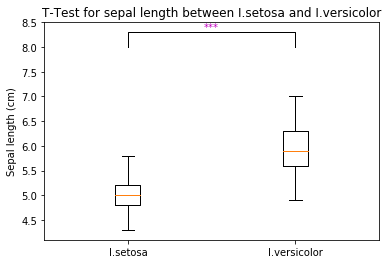

In [60]:
#boxplot으로 시각화하기
plt.boxplot([setosa_sl, versicolor_sl])
t, p = stats.ttest_ind(setosa_sl, versicolor_sl)

#star mark 표시하기
if(p<0.05 and p>=0.01):
    sig = '*'
elif(p<0.01 and p>=0.001):
    sig = '**'
elif(p<0.001):
    sig = '***'
else:
    sig = 'ns'
    
x1, x2 = 1,2   
y, h = np.max([setosa_sl, versicolor_sl]) + 1, 0.3

#선 그리기. x,y 좌표에 따라 선을 그림. (x1,y) > (x1,y+h)... lw: 선 굵기, c: color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')

#글 적기. 좌표 지정 후 내용, 좌우정렬, 수직정렬, 색상 순
plt.text((x1+x2)*.5, y+h, sig, ha='center', va='bottom', color='m')

plt.xticks([1,2],['I.setosa','I.versicolor'])
plt.ylabel('Sepal length (cm)')
plt.title('T-Test for sepal length between I.setosa and I.versicolor')
plt.show()